# Inbuilt KNN on Breast cancer dataset

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
cancer = load_breast_cancer()

In [5]:
clf = KNeighborsClassifier()

In [7]:
X = cancer.data
y = cancer.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
clf.score(X_test, y_test)

0.9521276595744681

# Finding optimal k using Cross validation

In [13]:
from sklearn.model_selection import cross_val_score

x_axis = []
y_axis = []

for i in range(1, 26, 2):  #i represents the no of neighbors which are odd
    clf1 = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf1, X_train, y_train)
    print(i, score.mean())
    x_axis.append(i)
    y_axis.append(score.mean())
    


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


1 0.8950293973669958
3 0.9028829078656835
5 0.9081325771778528
7

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value

 0.9028620771361914
9 0.910715587634879
11 0.910715587634879
13 0.9002370797400325


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value

15 0.9001957437611966
17 0.9001957437611966
19 0.8949255691996835
21 0.8975915770945299
23 0.8975915770945299
25 0.8871130691996835


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


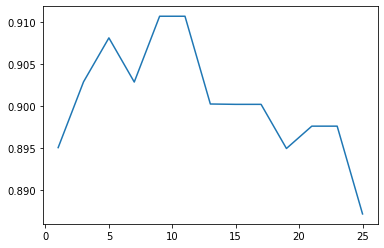

In [14]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)
plt.show()

### So from above graph optimal k is 9 as it has max score/ accuracy.

# Custom Implementation of KNN on Breast cancer dataset

In [16]:
from sklearn.metrics import accuracy_score
from collections import Counter

In [19]:
def train(X, y):   #nothing happens at the time of training, So simply return
    return 

def predict_one(X_train, y_train, X_test, k):   #predicts for only one point
    
    distances = []
    for i in range(len(X_train)):
        distance = ((X_train[i, :] - X_test) ** 2).sum()
        distances.append([distance, i])  #Appending the distance along with the index of the point from which distance is calculated
        
    distances = sorted(distances)  #sorting the distances array on the basis of first index ie distance
    targets = []
    for i in range(k):
        targets.append(y_train[distances[i][1]])
            
    return Counter(targets).most_common(1)[0][0]  #to return the class with max occurence in the targets.
    
def predict(X_train , y_train, X_test_data, k):
    predictions = []
    for x_test in X_test_data:
        predictions.append(predict_one(X_train, y_train, x_test, k))
        
    return predictions
    

In [20]:
y_pred = predict(X_train, y_train, X_test, 9)
accuracy_score(y_test, y_pred)

0.973404255319149

In [21]:
a = [1, 0, 1, 1, 1, 1, 2]
Counter(a)  #returns the value with its count

Counter({1: 5, 0: 1, 2: 1})

In [23]:
Counter(a).most_common(2)  #gives 2 most common values

[(1, 5), (0, 1)]

In [25]:
Counter(a).most_common(1)[0][0]  #to get the required value

1